# Problem Statement 1 Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name	Description

Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 
flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")  

### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# drop the id column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [31]:
df = pd.get_dummies(df, columns=['cut'])

In [32]:
df = pd.get_dummies(df, columns=['color'])

In [33]:
df = pd.get_dummies(df, columns=['clarity'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  int64  
 7   cut_Fair       26933 non-null  uint8  
 8   cut_Good       26933 non-null  uint8  
 9   cut_Ideal      26933 non-null  uint8  
 10  cut_Premium    26933 non-null  uint8  
 11  cut_Very Good  26933 non-null  uint8  
 12  color_D        26933 non-null  uint8  
 13  color_E        26933 non-null  uint8  
 14  color_F        26933 non-null  uint8  
 15  color_G        26933 non-null  uint8  
 16  color_H        26933 non-null  uint8  
 17  color_I        26933 non-null  uint8  
 18  color_

In [35]:
df.describe(include="all")

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,...,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120,0.028961,0.090410,0.401181,...,0.102662,0.053466,0.013515,0.033082,0.243753,0.169458,0.151747,0.226228,0.068281,0.093937
std,0.477237,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862,0.167699,0.286773,0.490147,...,0.303523,0.224965,0.115468,0.178854,0.429353,0.375163,0.358782,0.418396,0.252231,0.291746
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### unique values for categorical variables

In [36]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

### Converting Instant_bookable from 'f' and 't' to boolean

In [37]:
#df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [38]:
#df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [39]:
df.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [40]:
# Are there any missing values ?
df.isnull().sum()

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

### Imputing missing values

In [14]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()        

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [16]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.394509,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Checking for duplicates

In [17]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

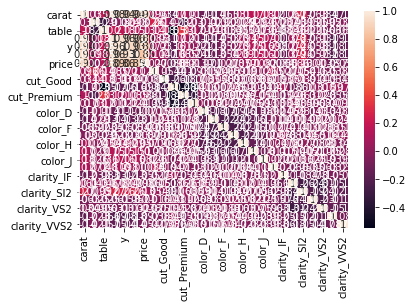

In [41]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [42]:
df.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  int64  
 7   cut_Fair       26933 non-null  uint8  
 8   cut_Good       26933 non-null  uint8  
 9   cut_Ideal      26933 non-null  uint8  
 10  cut_Premium    26933 non-null  uint8  
 11  cut_Very Good  26933 non-null  uint8  
 12  color_D        26933 non-null  uint8  
 13  color_E        26933 non-null  uint8  
 14  color_F        26933 non-null  uint8  
 15  color_G        26933 non-null  uint8  
 16  color_H        26933 non-null  uint8  
 17  color_I        26933 non-null  uint8  
 18  color_

### Outlier Checks

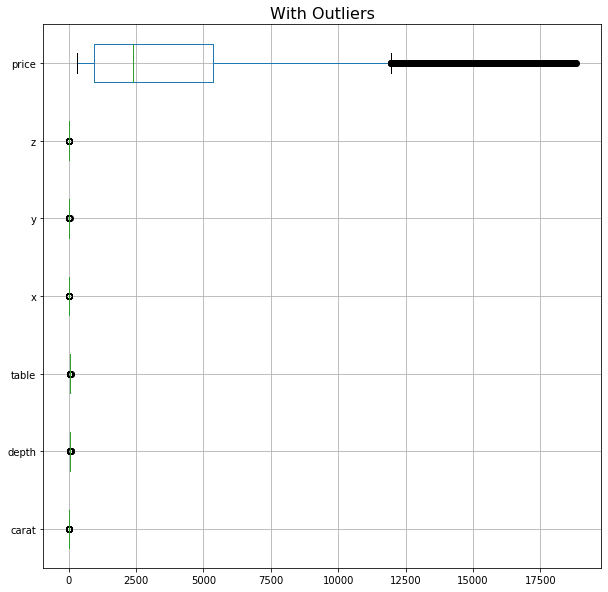

In [24]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

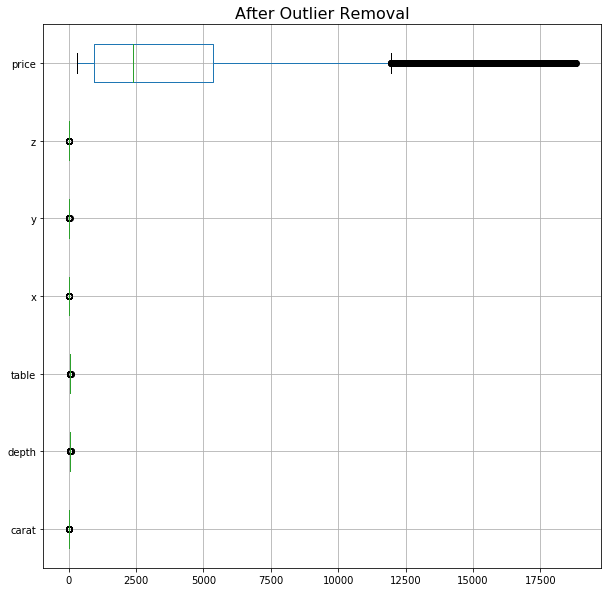

In [25]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

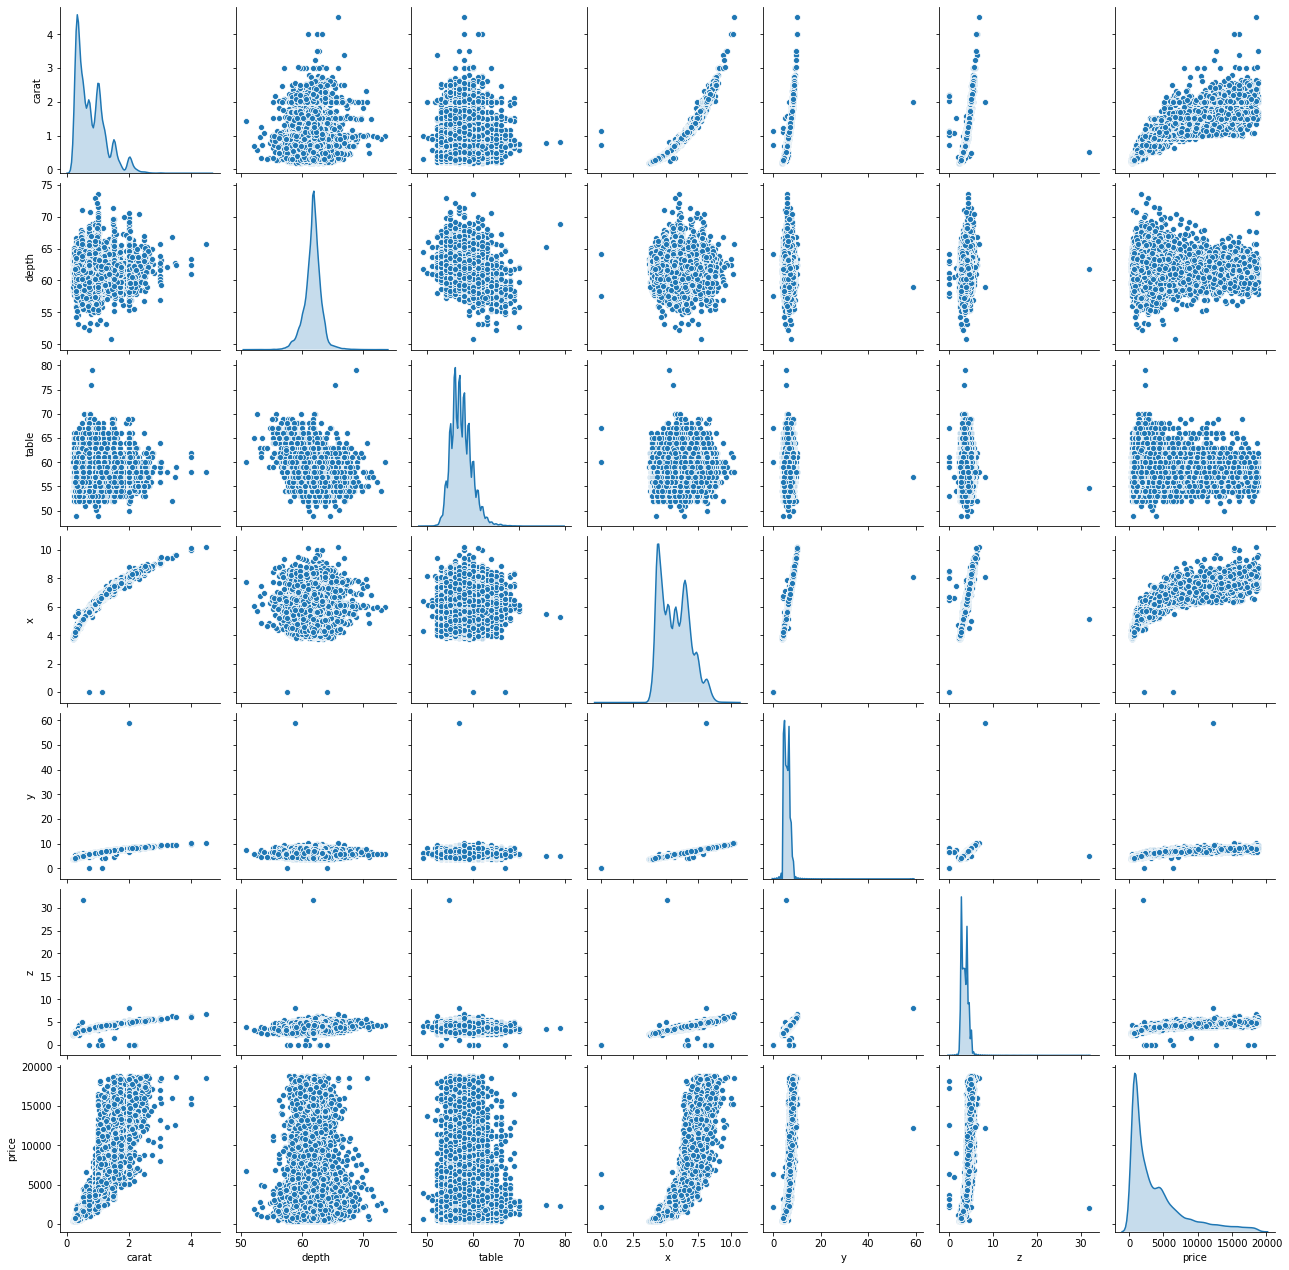

In [26]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [44]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [45]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [47]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11504.496947599979
The coefficient for depth is -65.89596127539183
The coefficient for table is -27.086014040007417
The coefficient for x is -1086.6786188327287
The coefficient for y is -0.5137376565389793
The coefficient for z is -48.680188326565315
The coefficient for cut_Fair is -546.3530846372639
The coefficient for cut_Good is -0.5459111997318652
The coefficient for cut_Ideal is 248.4891636576928
The coefficient for cut_Premium is 162.58110654711606
The coefficient for cut_Very Good is 135.82872563219084
The coefficient for color_D is 843.4362257381875
The coefficient for color_E is 645.510356610105
The coefficient for color_F is 556.564400725059
The coefficient for color_G is 351.5828640909682
The coefficient for color_H is -161.5437127970844
The coefficient for color_I is -677.5095371989886
The coefficient for color_J is -1558.0405971682435
The coefficient for clarity_I1 is -3696.9728371986216
The coefficient for clarity_IF is 1486.3665957403236
The 

In [49]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6246.845266450715


In [50]:
# R square on training data
regression_model.score(X_train, y_train)

0.920597549413368

50% of the variation in the log_price is explained by the predictors in the model for train set

In [51]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9230107291708042

In [52]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1128.69758366084

In [53]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1130.072034729901

### Linear Regression using statsmodels

In [54]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
16494,0.70,62.6,57.0,5.64,5.67,3.54,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1874
2401,1.24,61.4,59.0,6.87,6.91,4.23,0,0,0,1,...,0,0,0,0,1,0,0,0,0,6840
21354,0.35,61.6,55.0,4.54,4.49,2.78,0,0,1,0,...,0,0,0,0,0,0,1,0,0,984
14899,0.91,64.6,58.0,6.02,6.12,3.92,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4265
3993,0.31,60.5,57.0,4.40,4.36,2.65,0,0,1,0,...,0,0,0,0,1,0,0,0,0,523


In [55]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [56]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [64]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_Very Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [65]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

SyntaxError: invalid syntax (<unknown>, line 1)

In [59]:
print(lm1.summary())

NameError: name 'lm1' is not defined

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [60]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

NameError: name 'lm1' is not defined

In [44]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.5159255811569985

In [45]:
np.sqrt(lm1.mse_resid) #another way

0.5160018732951102

In [46]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

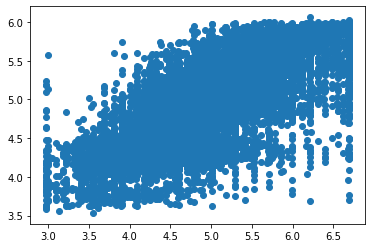

In [47]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [48]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + 

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

